
# Plant Classification Capstone Project

----
This project aims to categorize 99 plant species using leaf characteristics: shape, margin, and texture. Various machine learning algorithms are employed and evaluated, including Naive Bayes, SVM, Logistic Regression, k-NN, and Decision Trees. Data preprocessing involves standard scaling, while cross-validation enhances model performance. Optimal parameters are determined through grid search. 


## 1. Introduction:

The objective of this project is to develop a machine learning algorithm that is able to accurately identify a plant species based on data extracted from processed images. 


## 2. Datasets:
The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species in total, 10 samples each of 99 species are labeled, the other 6 samples are used to evaluate the model via Kaggle) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

**Let's have a look at the given datasets:**

In [48]:
# Importing some useful/necessary packages
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from itertools import product

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score,  confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Read the .csv files as pandas dataframe
df = pd.read_csv('train.csv')
df = df.drop('id', axis=1)
#print type(train_raw), type(test_raw)
print ('There are {}'.format(df.shape[0]), \
       'samples for building the machine learning model and {}'.format(df.shape[0]), \
       'samples for evaluating your model')

There are 990 samples for building the machine learning model and 990 samples for evaluating your model


In [15]:
# Let's look at the first 5 rows of train_raw dataset
df.head(5)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [16]:
# Let's review if there are any null values in the data
df.isnull().sum()

species      0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64

In [17]:
# Checking balance on train set
df['species'].value_counts(normalize = True)

species
Acer_Opalus                    0.010101
Crataegus_Monogyna             0.010101
Acer_Mono                      0.010101
Magnolia_Heptapeta             0.010101
Acer_Capillipes                0.010101
                                 ...   
Alnus_Rubra                    0.010101
Rhododendron_x_Russellianum    0.010101
Cytisus_Battandieri            0.010101
Liriodendron_Tulipifera        0.010101
Sorbus_Aria                    0.010101
Name: proportion, Length: 99, dtype: float64

**df** dataset has the shape of [990x194]. 990 represents the number of species, and 194 represents individual features in columns i.e. 'id', 'species', 'margin1-64', 'shape1-64', 'texture1-64'.

More in detail for 194:
- id - an anonymous id unique to an image
- species - 99 species, not given in test.csv
- margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
- shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
- texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

## 3. Methods

To make life easier, *Python* and *Scikit-learn* were depolyed in this project.


**Cross-validation**

To improve our model's effectiveness, we'll employ cross-validation. This technique involves repeatedly dividing the data and training several models.

**Grid Search**

Grid search is the most widely utilized approach for determining optimal model parameters. It essentially involves testing all potential combinations of the parameters under consideration.


We will follow these steps in our project:

1. Preprocess the data
    - Split data for training and testing
    - Split for cross-validation
    - Standard-scaler
- Feed the preprocessed data into the selected classifiers
    1. Naive Bayes
    - Support Vector Machine (SVM)
    - Logistic Regression
    - k-nearest neighbours (k-NN)
    - Random Forest
- Evaluate the classifiers

**Evaluation Metrics**

We will evaluate each model based on it's accuracy rate and the minimization of the log loss function.



## 4. Implementation

### 4.1 Data preprocessing for classifiers

To organize the data, scikit learn provides [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [18]:
# Split data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

# Split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('species', axis=1), train_data.species, 
                                                  test_size=0.3, random_state=42, stratify=train_data.species)
# Fit LabelEncoder to the training set and transform both the training and validation set labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

#### Split the 'train' data for cross-validation
KFold cross validation iterator is used to split the training dataset.

In [19]:
# Define the iterator
kf_split = KFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf_split.split(df)):
    # Split the data into training and test sets
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(485, 192)
(485,)
(208, 192)
(208,)


In [21]:
# Check the encoding of the target variable
print("Unique values in y_train_encoded:", len(set(y_train_encoded)))
print("y_train_encoded value counts:\n", pd.Series(y_train_encoded).value_counts())

print("Unique values in y_val_encoded:", len(set(y_val_encoded)))
print("y_val_encoded value counts:\n", pd.Series(y_val_encoded).value_counts())

Unique values in y_train_encoded: 99
y_train_encoded value counts:
 77    7
87    7
84    7
96    6
38    6
     ..
10    3
33    3
27    3
83    3
89    3
Name: count, Length: 99, dtype: int64
Unique values in y_val_encoded: 99
y_val_encoded value counts:
 90    3
42    3
84    3
22    3
38    3
     ..
35    1
9     1
40    1
66    1
17    1
Name: count, Length: 99, dtype: int64


Now we have split the 'train' dataset into two parts:
- X_train, y_train
- X_val, y_val

In [41]:
## Let us define a function to plot confusion matrix for our classification models

In [66]:
#Plot function

def plot_confusion_matrix(cm, classes, filename,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix, then saves it to a file.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(45, 36))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
    plt.savefig(filename)  # Save the file
    plt.show()

### 4.2 Machine learning classifiers

The following listed classifiers are selected in this project as their popularity.
1. Naive Bayes
- SVM
- Logistic Regression
- k-nearest neighbours (k-NN)
- LinearDiscriminantAnalysis


#### 4.2.1 Naive Bayes

ML Model: GaussianNB
Accuracy: 35.5769%
Precision: 37.9317%
Recall: 35.5769%
Log Loss: 23.0879
Confusion matrix, without normalization


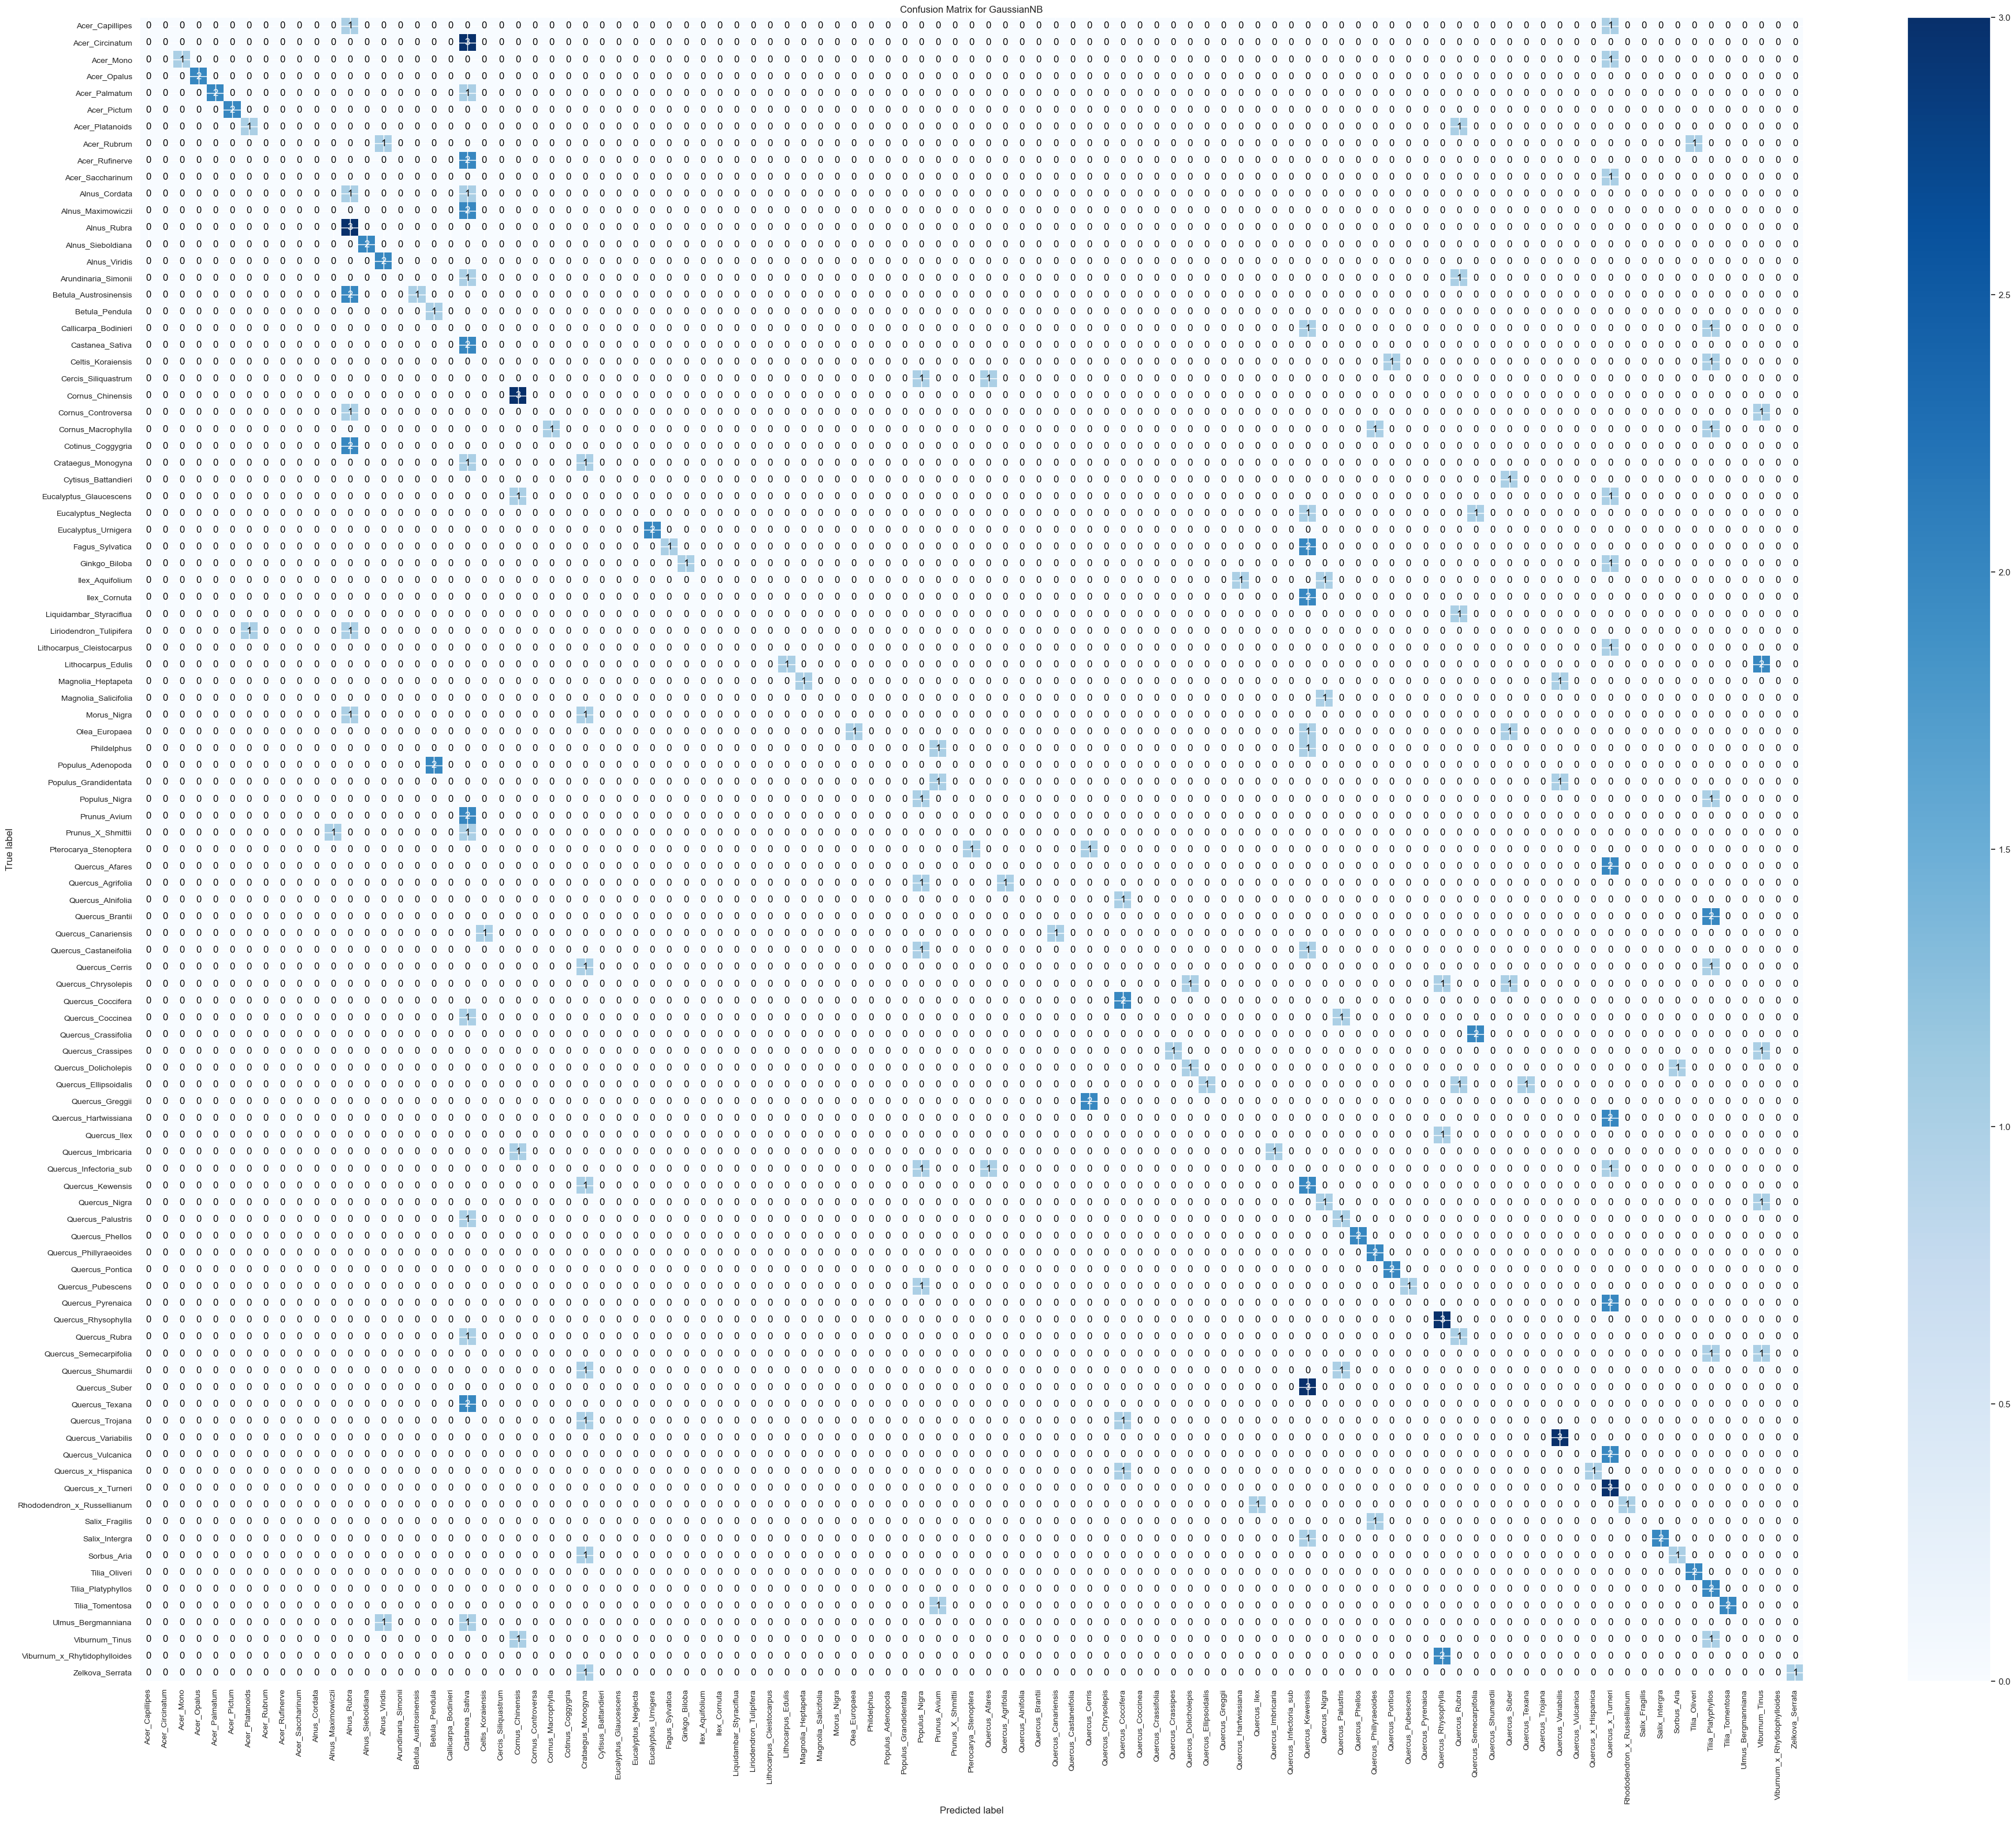

In [67]:
# GaussianNB Model Training and Predictions
clf = GaussianNB().fit(X_train, y_train_encoded)
print('ML Model:', clf.__class__.__name__)

# Cross-validation
scores = cross_val_score(GaussianNB(), X_train.values, y_train_encoded, cv=kf_split)

# Predicting class labels for the validation set
train_predictions = clf.predict(X_val)

#Accuracy
acc = accuracy_score(y_val_encoded, train_predictions)
print ('Accuracy: {:.4%}'.format(acc))

#Precision
precision = precision_score(y_val_encoded, train_predictions, average='weighted',zero_division=0)
print('Precision: {:.4%}'.format(precision))

#Recall
recall = recall_score(y_val_encoded, train_predictions,average='weighted')
print('Recall: {:.4%}'.format(recall))

# Log loss calculation using probabilities
train_predictions_proba = clf.predict_proba(X_val)
ll = log_loss(y_val_encoded, train_predictions_proba)
print ('Log Loss: {:.6}'.format(ll))

# Confusion matrix calculation should use class labels, not probabilities
cm_gnb = confusion_matrix(y_val_encoded, train_predictions)
class_names = le.classes_
plot_confusion_matrix(cm_gnb, class_names, 'confusion_matrix_gnb.png', title='Confusion Matrix for GaussianNB')
plt.show()

#### 4.2.2 Support Vector Machine

In [23]:
clf = SVC(probability=True)

# Grid search
#param_grid = {'C': [1, 10, 100, 1000, 10000, 100000],
#              'gamma': [1, 10, 100, 1000, 10000, 100000]}
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=kf_split)
grid_search.fit(X_train, y_train)

print ('Best parameter: {}'.format(grid_search.best_params_))
print ('Best cross-validation accuracy score: {}'.format(grid_search.best_score_))
print ('\nBest estimator:\n{}'.format(grid_search.best_estimator_))

Best parameter: {'C': 100, 'gamma': 1}
Best cross-validation accuracy score: 0.8372448979591838

Best estimator:
SVC(C=100, gamma=1, probability=True)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.9615%
Precision: 0.0092%
Recall: 0.9615%
Log Loss: 4.61799
Confusion matrix, without normalization


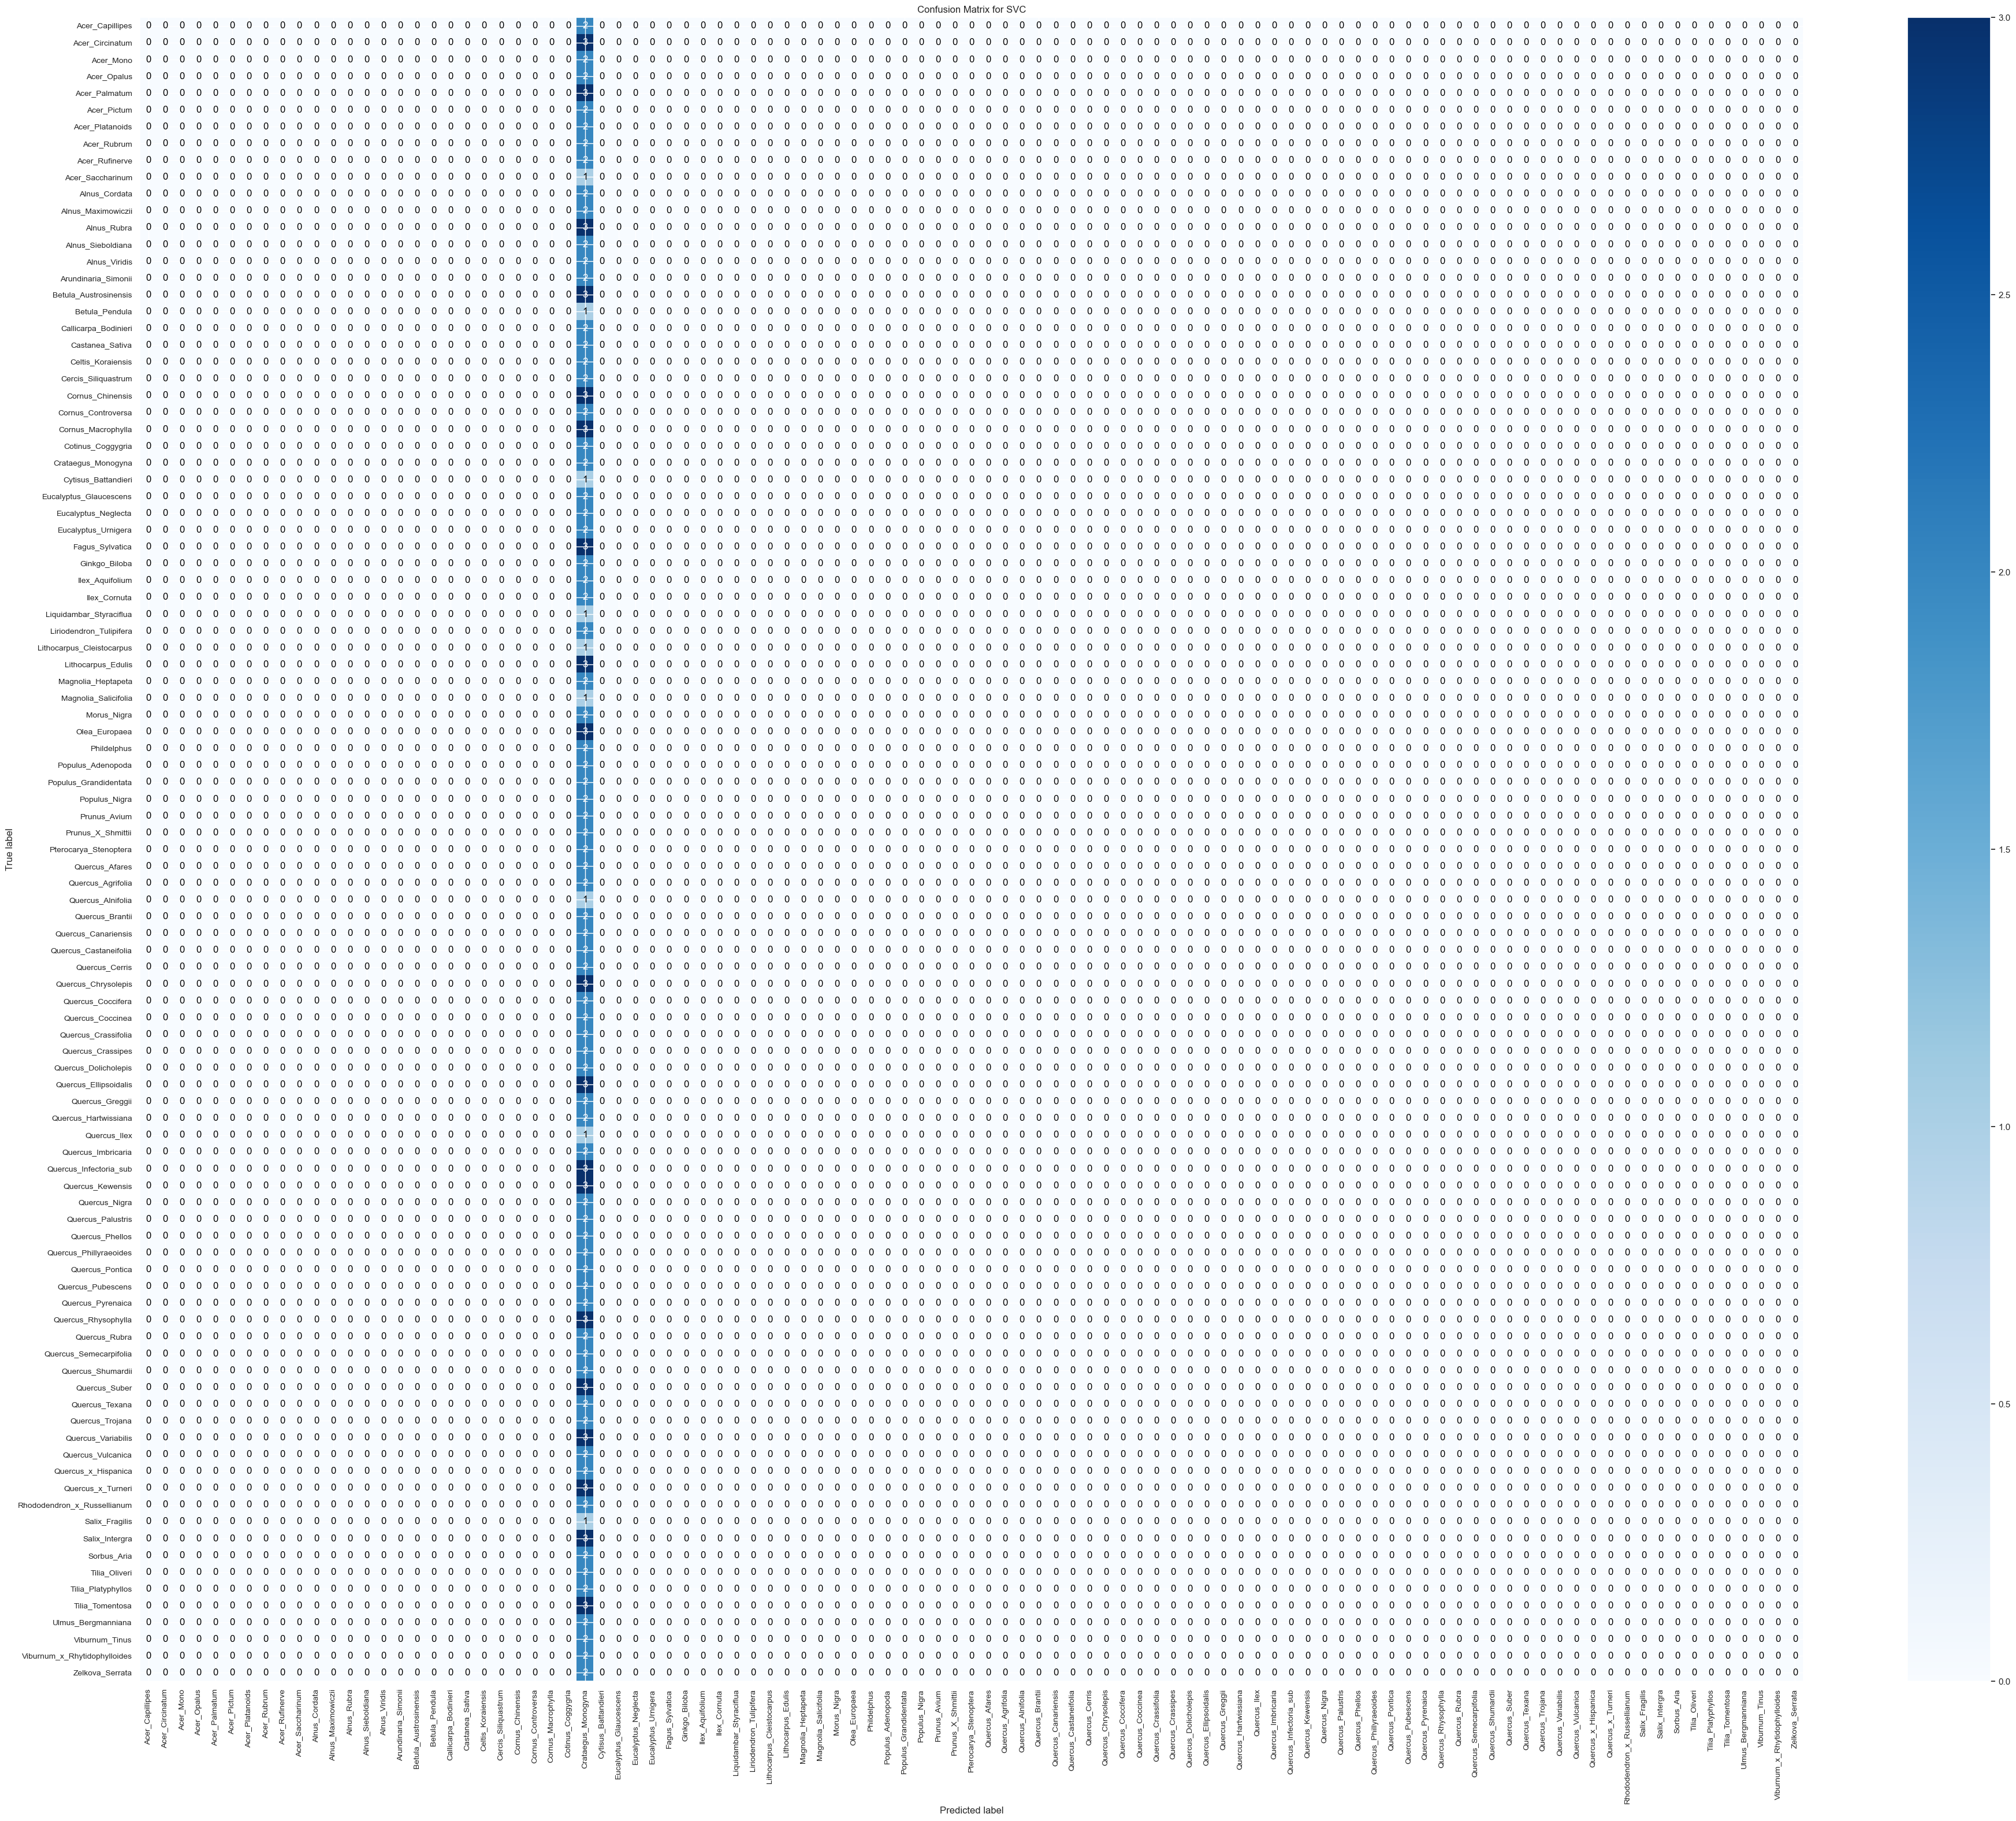

In [69]:
# Making predictions for class labels
train_predictions = grid_search.predict(X_val)

# Accuracy
acc = accuracy_score(y_val, train_predictions)
print('Accuracy: {:.4%}'.format(acc))

# Precision
precision = precision_score(y_val, train_predictions, average='weighted', zero_division=0)
print('Precision: {:.4%}'.format(precision))

# Recall
recall = recall_score(y_val, train_predictions, average='weighted')
print('Recall: {:.4%}'.format(recall))

# Logloss - First get the predicted probabilities
train_predictions_proba = grid_search.predict_proba(X_val)
ll = log_loss(y_val, train_predictions_proba)
print('Log Loss: {:.6}'.format(ll))

# Confusion Matrix - make sure to use train_predictions which are the class labels, not the probabilities
cm_svc = confusion_matrix(y_val, train_predictions)
class_names = le.classes_  # Assuming 'le' is your LabelEncoder instance
plot_confusion_matrix(cm_svc, class_names, 'confusion_matrix_svc.png', title='Confusion Matrix for SVC')

#### 4.2.3 Logistic Regression

ML Model: Logistic Regression


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    mul

Accuracy: 98.5577%
Precision: 99.1186%
Recall: 98.5577%
Log Loss: 0.199070
Confusion matrix, without normalization


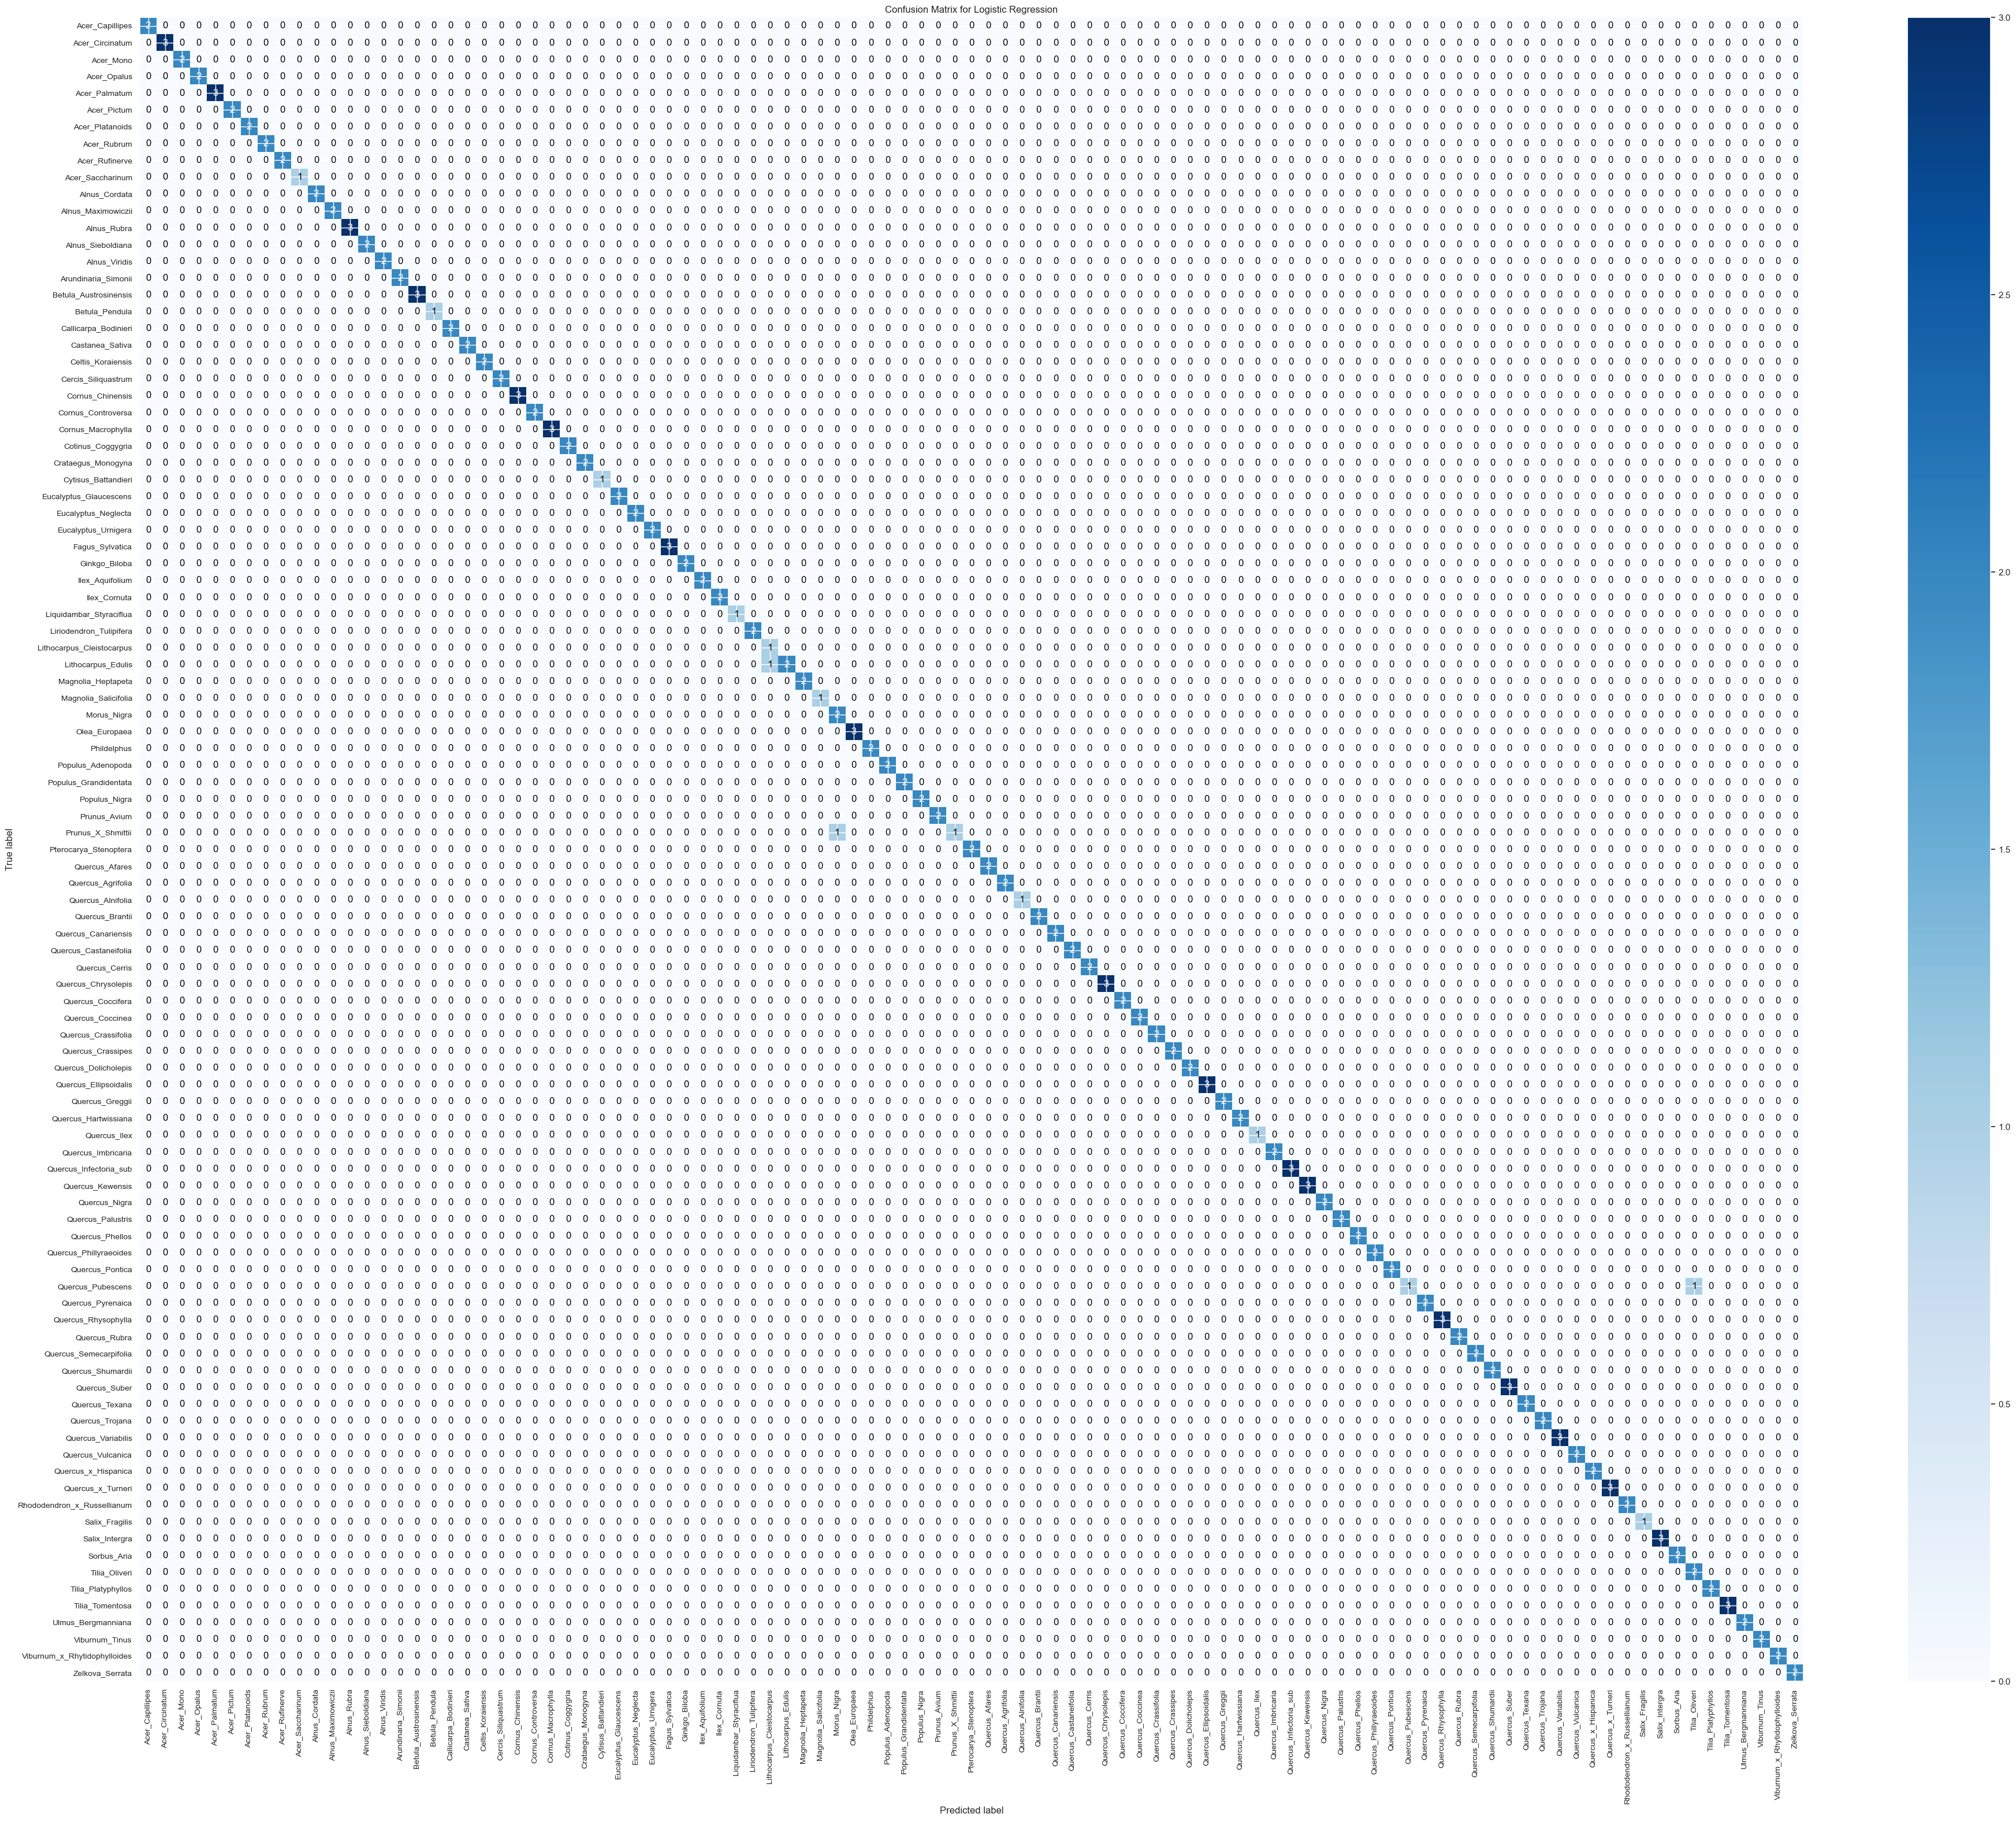

In [72]:
# Scale data
scaler = StandardScaler().fit(X_train)  # Make sure you fit on X_train not X_val to prevent data leakage
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Transform X_val with the fitted scaler

print('ML Model: Logistic Regression')

# Logistic Regression GridSearch (ensure the Logistic Regression model part is correctly done before this step)
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1], 'solver': ['liblinear', 'lbfgs']}  # example parameter grid
LR_model = LogisticRegression(max_iter=10000, multi_class='multinomial')
grid_search_lr = GridSearchCV(LR_model, param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)

# Predictions for class labels
train_predictions = grid_search_lr.predict(X_val_scaled)

# Accuracy
acc = accuracy_score(y_val, train_predictions)
print('Accuracy: {:.4%}'.format(acc))

# Precision
precision = precision_score(y_val, train_predictions, average='weighted', zero_division=0)
print('Precision: {:.4%}'.format(precision))

# Recall
recall = recall_score(y_val, train_predictions, average='weighted')
print('Recall: {:.4%}'.format(recall))

# Log Loss using probabilities
train_predictions_proba = grid_search_lr.predict_proba(X_val_scaled)
ll = log_loss(y_val, train_predictions_proba)
print('Log Loss: {:.6f}'.format(ll))

# Confusion Matrix
cm_lr = confusion_matrix(y_val, train_predictions)  # Use train_predictions not train_predictions_p
class_names = le.classes_  # Assuming 'le' is your LabelEncoder instance
plot_confusion_matrix(cm_lr, class_names, 'confusion_matrix_lr.png', title='Confusion Matrix for Logistic Regression')

#### 4.2.4 K-Nearest Neighbours 

ML Model:  KNeighborsClassifier
Mean Cross-validation scores: 70.7270%
Accuracy: 84.6154%
Precision: 85.0240%
Recall: 84.6154%
Log Loss: 2.539839
Confusion matrix, without normalization


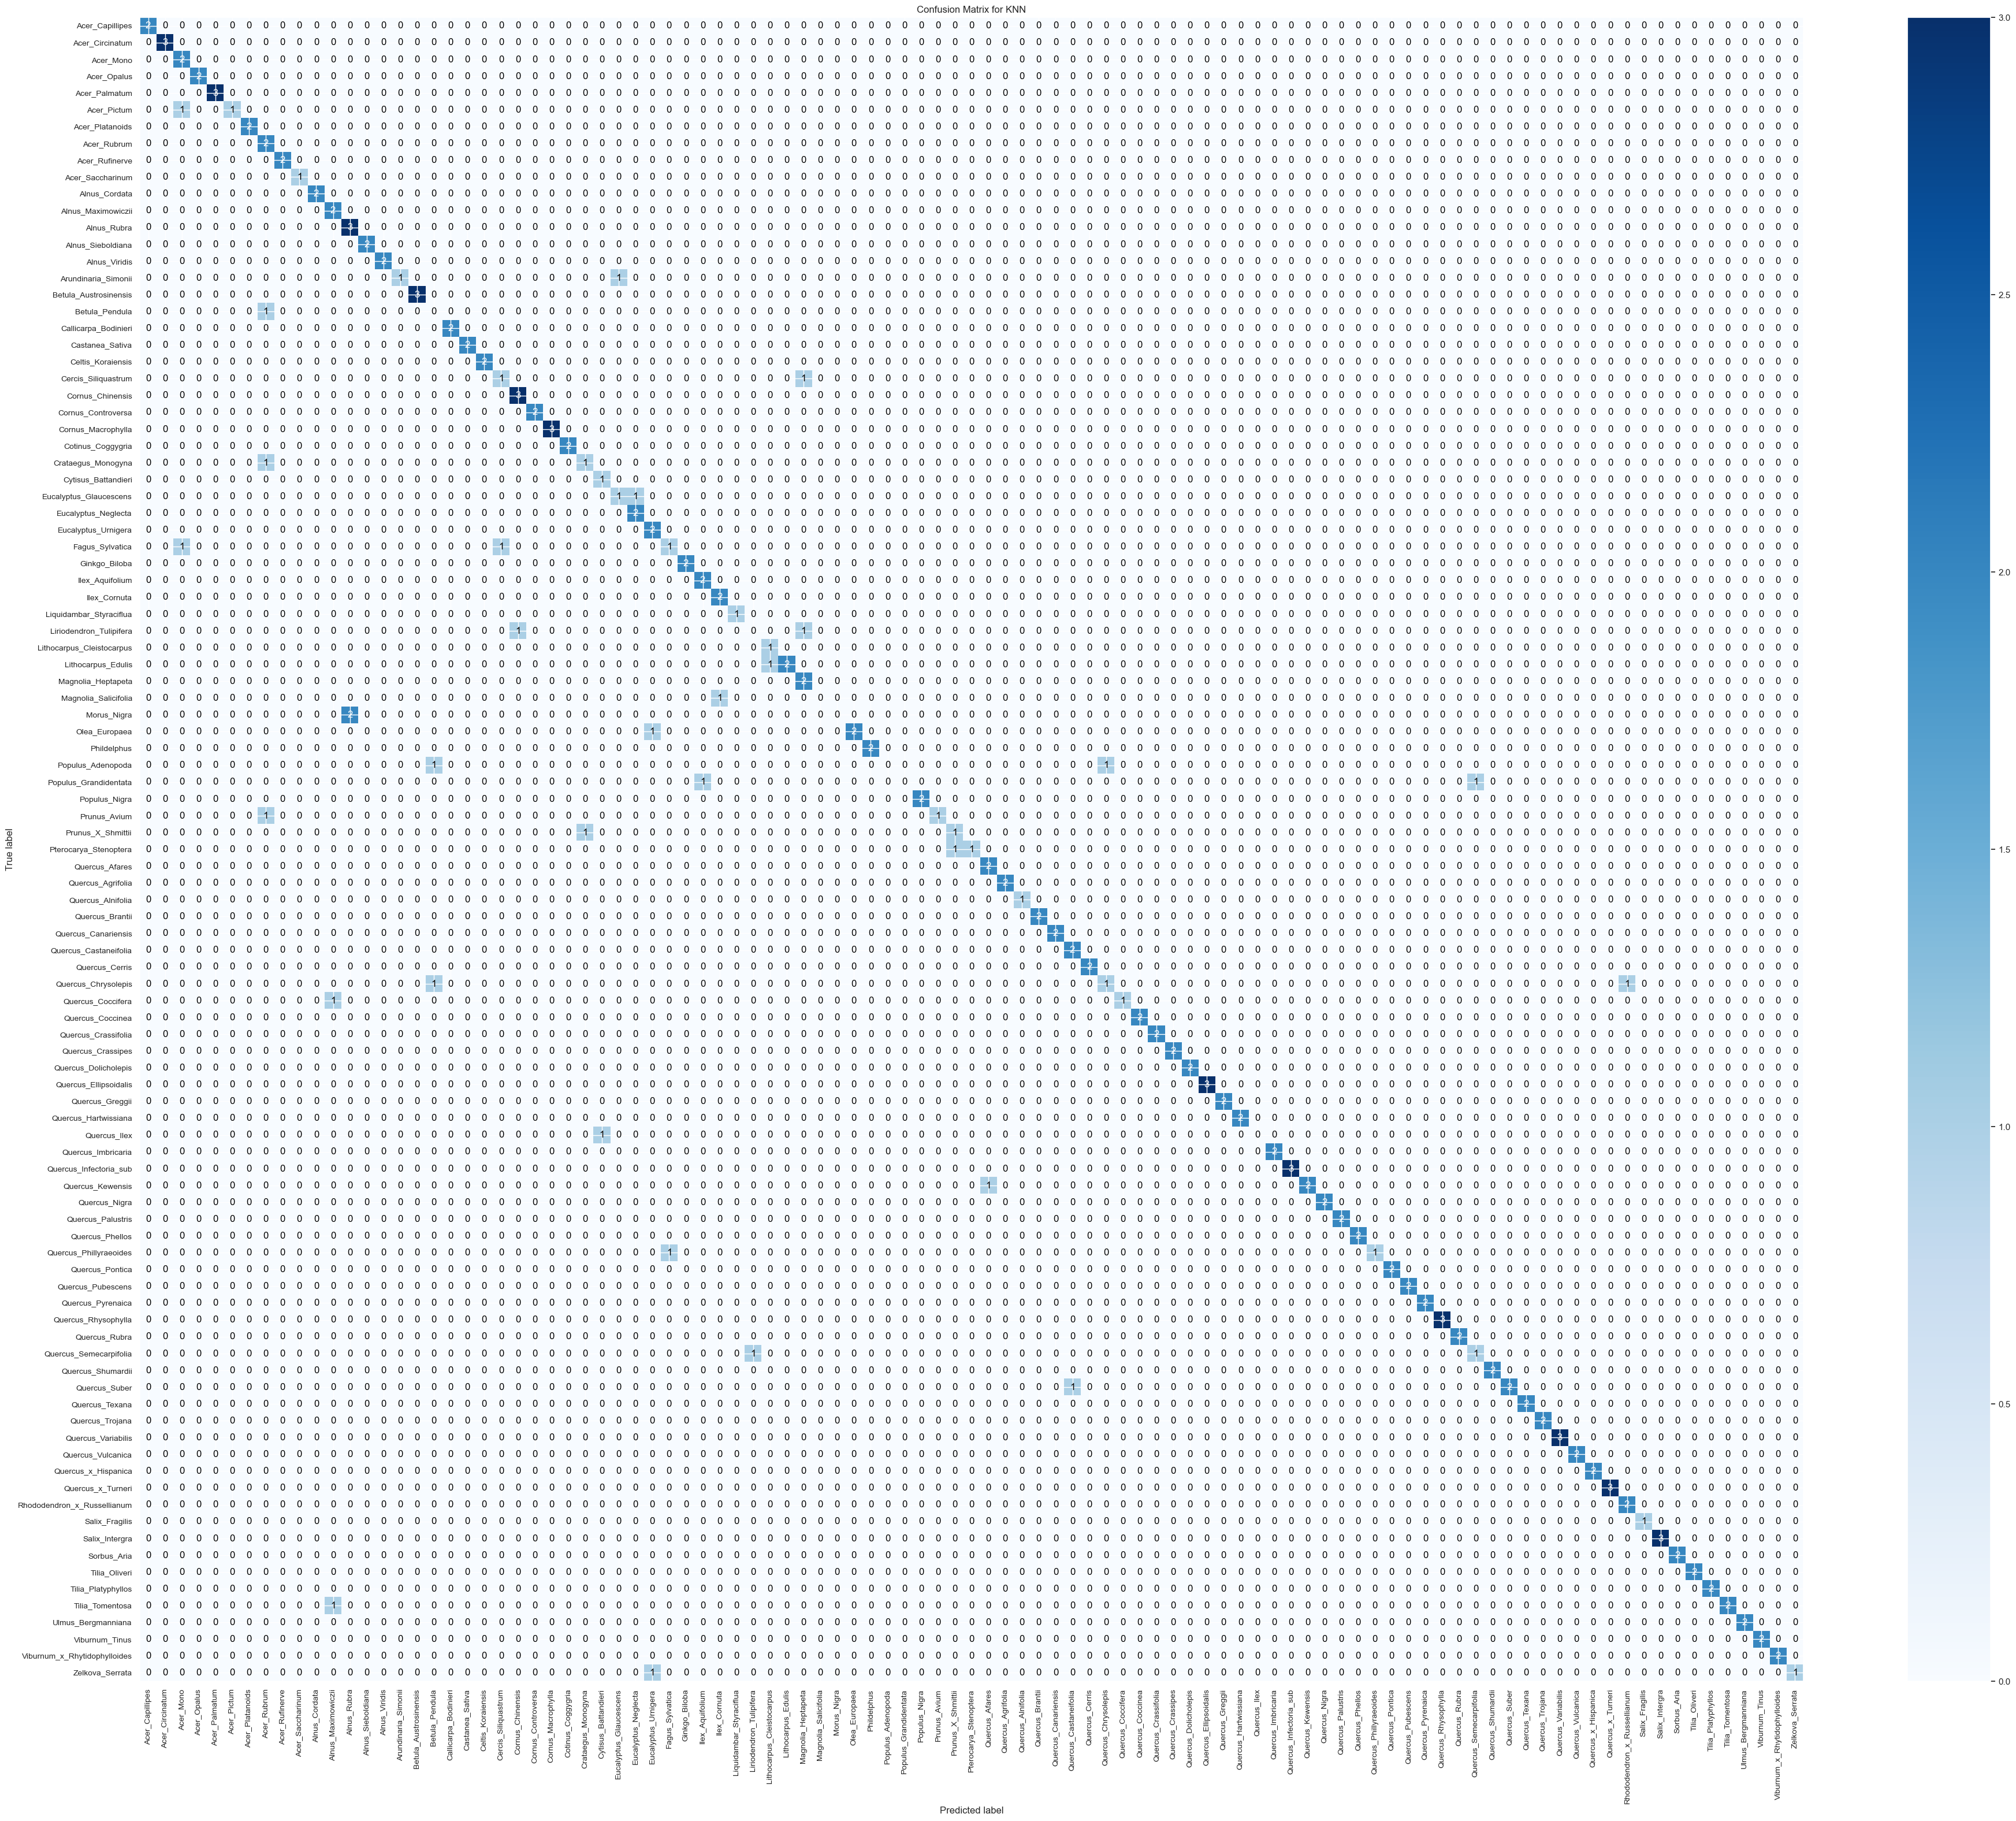

In [74]:
# Setup classifier
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
print('ML Model: ', clf.__class__.__name__)

# Cross-validation
scores = cross_val_score(KNeighborsClassifier(3), X_train, y_train, cv=kf_split)
print('Mean Cross-validation scores: {:.4%}'.format(np.mean(scores)))

# Predicting on validation set
train_predictions = clf.predict(X_val)

# Accuracy
acc = accuracy_score(y_val, train_predictions)
print('Accuracy: {:.4%}'.format(acc))

# Precision
precision = precision_score(y_val, train_predictions, average='weighted', zero_division=0)
print('Precision: {:.4%}'.format(precision))

# Recall
recall = recall_score(y_val, train_predictions, average='weighted')
print('Recall: {:.4%}'.format(recall))

# Log Loss
train_predictions_proba = clf.predict_proba(X_val)
ll = log_loss(y_val, train_predictions_proba)
print('Log Loss: {:.6f}'.format(ll))

# Confusion Matrix
cm_knn = confusion_matrix(y_val, train_predictions)
class_names = le.classes_  # get class names from LabelEncoder used earlier
plot_confusion_matrix(cm_knn, class_names, 'confusion_matrix_knn.png', title='Confusion Matrix for KNN')